In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.summarization.bm25 import get_bm25_weights
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords 
import sklearn
import math
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min,jaccard_similarity_score
from sklearn.metrics.pairwise import cosine_similarity as cosu, euclidean_distances
from pylab import savefig

In [2]:
f=open("DoctorsSayKidsShouldLayOffJuice.txt", "r")

In [3]:
filename=f.name
file_name=filename.split('.')

In [4]:
data=(f.read())
print(data)

 
Most parents wouldn't dream of it. But researchers say that when a baby's bottle or cup is filled with juice even the 100 percent, all natural, no sugar added stuff  parents might as well be pouring Pepsi.

A growing body of science is linking sweet drinks, natural or otherwise, to a host of child health concerns, everything from bulging bellies to tooth decay.

 
"All of these beverages are largely the same. They are 100 percent sugar," Dr. David Ludwig, an expert on pediatric obesity at Children's Hospital Boston, said recently. "Juice is only minimally better than soda."The trouble is that parents who are quick to limit a child's soft drink consumption often overlook or even encourage juice indulgence thanks to the beverage's good-for-you image.But that image can be overstated. Though healthy in moderation, juice essentially is water and sugar. In fact, a 12-ounce bottle of grape soda has 159 calories. The same amount of unsweetened grape juice packs 228 calories.

The $10 billion

In [5]:
data=[data]

In [6]:
sentences=[]
for s in data:
    sentences.append(sent_tokenize(s))
sentences = [[y] for x in sentences for y in x] # flatten list

In [7]:
(len(sentences))

32

In [8]:
sentences[0]

[" \nMost parents wouldn't dream of it."]

In [9]:
word_sentence=[]
for i in sentences:
    for j in i:
        word_sentence.append(word_tokenize(j))
word_sentence

[['Most', 'parents', 'would', "n't", 'dream', 'of', 'it', '.'],
 ['But',
  'researchers',
  'say',
  'that',
  'when',
  'a',
  'baby',
  "'s",
  'bottle',
  'or',
  'cup',
  'is',
  'filled',
  'with',
  'juice',
  'even',
  'the',
  '100',
  'percent',
  ',',
  'all',
  'natural',
  ',',
  'no',
  'sugar',
  'added',
  'stuff',
  'parents',
  'might',
  'as',
  'well',
  'be',
  'pouring',
  'Pepsi',
  '.'],
 ['A',
  'growing',
  'body',
  'of',
  'science',
  'is',
  'linking',
  'sweet',
  'drinks',
  ',',
  'natural',
  'or',
  'otherwise',
  ',',
  'to',
  'a',
  'host',
  'of',
  'child',
  'health',
  'concerns',
  ',',
  'everything',
  'from',
  'bulging',
  'bellies',
  'to',
  'tooth',
  'decay',
  '.'],
 ['``',
  'All',
  'of',
  'these',
  'beverages',
  'are',
  'largely',
  'the',
  'same',
  '.'],
 ['They',
  'are',
  '100',
  'percent',
  'sugar',
  ',',
  "''",
  'Dr.',
  'David',
  'Ludwig',
  ',',
  'an',
  'expert',
  'on',
  'pediatric',
  'obesity',
  'at',
  'C

In [10]:
#removal of stop words
stop_words = set(stopwords.words('english')) 
line=[]
filtered_sentence=[]

for i in word_sentence:
    for j in i:
        if not j in stop_words:
            line.append(j)
    filtered_sentence.append(line)
    line=[]



In [11]:
filtered_sentence[0]

['Most', 'parents', 'would', "n't", 'dream', '.']

In [12]:
#stemming the words
from nltk.stem import PorterStemmer 
ps = PorterStemmer()
stemmed_sentences=[]
line=[]
for i in filtered_sentence:
    for j in i:
       line.append(ps.stem(j))
    stemmed_sentences.append(line)
    line=[]

In [13]:
# remove punctuations, numbers and special characters
alphabetic_sentences=[]
line=[]
for i in stemmed_sentences:
    line.append(pd.Series(i).str.replace("[^a-zA-Z]", " "))
    
    
    alphabetic_sentences.append(line)
    line=[]

In [14]:
line = []

for i in alphabetic_sentences:
   
    for j in i:
        l=[]
        for x in j.values:
            if not x ==' ':
                l.append(x.lower())
        line.append(l)
line

[['most', 'parent', 'would', 'n t', 'dream'],
 ['but',
  'research',
  'say',
  'babi',
  ' s',
  'bottl',
  'cup',
  'fill',
  'juic',
  'even',
  '   ',
  'percent',
  'natur',
  'sugar',
  'ad',
  'stuff',
  'parent',
  'might',
  'well',
  'pour',
  'pepsi'],
 ['a',
  'grow',
  'bodi',
  'scienc',
  'link',
  'sweet',
  'drink',
  'natur',
  'otherwis',
  'host',
  'child',
  'health',
  'concern',
  'everyth',
  'bulg',
  'belli',
  'tooth',
  'decay'],
 ['  ', 'all', 'beverag', 'larg'],
 ['they',
  '   ',
  'percent',
  'sugar',
  '  ',
  'dr ',
  'david',
  'ludwig',
  'expert',
  'pediatr',
  'obes',
  'children',
  ' s',
  'hospit',
  'boston',
  'said',
  'recent'],
 ['  ', 'juic', 'minim', 'better', 'soda'],
 ['  ',
  'the',
  'troubl',
  'parent',
  'quick',
  'limit',
  'child',
  ' s',
  'soft',
  'drink',
  'consumpt',
  'often',
  'overlook',
  'even',
  'encourag',
  'juic',
  'indulg',
  'thank',
  'beverag',
  ' s',
  'good for y',
  'image but',
  'imag',
  'overst'

In [15]:
words=[]
words=[y for x in line for y in x ]

#Taking all distinct words in an array
Distinct_Words=[y for y in set(words)]

In [16]:
len(Distinct_Words)

322

In [17]:

len(words)

575

# Data Visulaizaton

In [18]:
for i in range(len(Distinct_Words)):
    print (i,Distinct_Words[i])
    

0 with
1 half
2 consum
3 pepsi
4 mother
5 appl
6 amount
7 thi
8 befor
9 centuri
10 otherwis
11 all
12 offici
13 unsweeten
14 prevent
15 hampshir
16 drink
17 urg
18 water
19 yet
20 get
21 part
22 potenti
23 peopl
24 overst
25 vigil
26 releas
27 often
28 cut
29 divis
30 loss
31 elimin
32 center in
33 overweight
34 straight
35 fiber
36 could
37 felt
38 picki
39 jillian
40 would
41 hunger
42 girl
43 either
44 bag
45 primari
46 say
47 thirst
48 image but
49 without
50 pervert
51 wo
52 associ
53 averag
54 excess
55 child
56 food
57 duke
58 also
59 first
60 danger
61 day
62 decay
63 guidelin
64 moder
65 twin
66 what
67 avoid
68 stuff
69 healthi
70 tell
71 elaborate sh
72 pour
73 william
74 pudgi
75 risk
76 center
77 essenti
78 freysing
79 much
80 n t
81 doctor
82 scienc
83 conclus
84 given
85 usda
86 tooth
87 obes
88 year
89 bravend
90 agricultur
91 jade
92 balanc
93 that
94 said
95 percent
96 diseas
97 kind
98 solid
99 data
100 especi
101 bulg
102 label
103 medicin
104 hooksett
105 just
106 

## Count representation


In [19]:
word_Count_matrix=np.empty(shape=(len(line),len(Distinct_Words)))
word_Count_matrix.fill(0)

for i in range(len(line)):
    for j in range(len(line[i])):
        for x in range(len(Distinct_Words)):
            if (Distinct_Words[x]==line[i][j]):
                word_Count_matrix[i][x] = word_Count_matrix[i][x] +1
                continue
                
word_Count_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## BM-25

In [20]:
BM_25_weight=np.empty(shape=(len(line),len(Distinct_Words)))
BM_25_weight.fill(0)
    
    
avg_length=np.mean(word_Count_matrix.sum(axis=1))
    
length_size=np.array(1.5*word_Count_matrix.sum(axis=1)/avg_length)
    
isf=np.array(np.log(len(line)/np.count_nonzero(word_Count_matrix,axis=0)))

denominator=np.empty(shape=(len(line),len(Distinct_Words)))
for i in range(len(line)):
    denominator[i,:]=(word_Count_matrix[i,:]+length_size[i]+0.5)
    
BM_25_weight=(word_Count_matrix*isf)/(denominator)
BM_25_weight

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.29866285,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## Tf-idf

In [21]:
tfidf_weight=np.empty(shape=(len(line),len(Distinct_Words)))
tfidf_weight.fill(0)

tfidf_weight = word_Count_matrix*isf
tfidf_weight

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 3.4657359,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

## Binary

In [22]:
word_binary_matrix=np.empty(shape=(len(line),len(Distinct_Words)))
word_binary_matrix.fill(0)

for i in range(len(line)):
    for j in range(len(line[i])):
        for x in range(len(Distinct_Words)):
            if (Distinct_Words[x]==line[i][j]):
                word_binary_matrix[i][x] = 1
                continue
word_binary_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Similarities

## 1 Euclidean with BM25

In [23]:
euclidean_bm25 =euclidean_distances(BM_25_weight)
euclidean_bm25 = (1-(euclidean_bm25/np.max(euclidean_bm25)))
print(euclidean_bm25)

[[1.         0.20857086 0.12461002 ... 0.22659812 0.22079896 0.19927599]
 [0.20857086 1.         0.08734745 ... 0.15966562 0.16043945 0.14155363]
 [0.12461002 0.08734745 1.         ... 0.07890972 0.08428074 0.08237203]
 ...
 [0.22659812 0.15966562 0.07890972 ... 1.         0.19688912 0.15550391]
 [0.22079896 0.16043945 0.08428074 ... 0.19688912 1.         0.16298253]
 [0.19927599 0.14155363 0.08237203 ... 0.15550391 0.16298253 1.        ]]


## 2 Cosine with BM25

In [24]:
cosine_bm25=np.empty(shape=(len(line),len(line)))

for i in range(len(line)):
    for j in range(len(line)):
        dot_product = np.dot(BM_25_weight[i], BM_25_weight[j])
        norm_i = np.linalg.norm(BM_25_weight[i])
        norm_j = np.linalg.norm(BM_25_weight[j])
        cosine_bm25[i, j] = dot_product/(norm_i*norm_j)
cosine_bm25

array([[1.        , 0.02520846, 0.        , ..., 0.03085578, 0.        ,
        0.        ],
       [0.02520846, 1.        , 0.04714807, ..., 0.02522432, 0.01358619,
        0.01554017],
       [0.        , 0.04714807, 1.        , ..., 0.        , 0.        ,
        0.03532654],
       ...,
       [0.03085578, 0.02522432, 0.        , ..., 1.        , 0.0642309 ,
        0.0139516 ],
       [0.        , 0.01358619, 0.        , ..., 0.0642309 , 1.        ,
        0.01795559],
       [0.        , 0.01554017, 0.03532654, ..., 0.0139516 , 0.01795559,
        1.        ]])

## 3 Euclidean with tfidf

In [25]:
euclidean_tfidf =euclidean_distances(tfidf_weight)
euclidean_tfidf = (1-(euclidean_tfidf/np.max(euclidean_tfidf)))
print(euclidean_tfidf)

[[1.         0.47532324 0.44228591 ... 0.55231917 0.56056369 0.47830082]
 [0.47532324 1.         0.32341332 ... 0.39492237 0.4019568  0.34068847]
 [0.44228591 0.32341332 1.         ... 0.36320637 0.3734689  0.32536625]
 ...
 [0.55231917 0.39492237 0.36320637 ... 1.         0.48123841 0.39977253]
 [0.56056369 0.4019568  0.3734689  ... 0.48123841 1.         0.41164746]
 [0.47830082 0.34068847 0.32536625 ... 0.39977253 0.41164746 1.        ]]


## 4 Cosine with tfidf

In [26]:
cosine_tfidf=np.empty(shape=(len(line),len(line)))

for i in range(len(line)):
    for j in range(len(line)):
        dot_product = np.dot(tfidf_weight[i], tfidf_weight[j])
        norm_i = np.linalg.norm(tfidf_weight[i])
        norm_j = np.linalg.norm(tfidf_weight[j])
        cosine_tfidf[i, j] = dot_product/(norm_i*norm_j)
cosine_tfidf

array([[1.        , 0.02520846, 0.        , ..., 0.03085578, 0.        ,
        0.        ],
       [0.02520846, 1.        , 0.04714807, ..., 0.02522432, 0.01358619,
        0.01542107],
       [0.        , 0.04714807, 1.        , ..., 0.        , 0.        ,
        0.03505578],
       ...,
       [0.03085578, 0.02522432, 0.        , ..., 1.        , 0.0642309 ,
        0.01763096],
       [0.        , 0.01358619, 0.        , ..., 0.0642309 , 1.        ,
        0.02177899],
       [0.        , 0.01542107, 0.03505578, ..., 0.01763096, 0.02177899,
        1.        ]])

## 5 Euclidean with count

In [27]:
euclidean_count =euclidean_distances(word_Count_matrix)
euclidean_count = (1-(euclidean_count/np.max(euclidean_count)))
print(euclidean_count)

[[1.         0.52190856 0.53197477 ... 0.58596066 0.57461502 0.45664184]
 [0.52190856 1.         0.40638316 ... 0.46547752 0.45664184 0.36005953]
 [0.53197477 0.40638316 1.         ... 0.43938809 0.44794755 0.36754447]
 ...
 [0.58596066 0.46547752 0.43938809 ... 1.         0.53197477 0.43938809]
 [0.57461502 0.45664184 0.44794755 ... 0.53197477 1.         0.44794755]
 [0.45664184 0.36005953 0.36754447 ... 0.43938809 0.44794755 1.        ]]


## 6 Cosine with count

In [28]:
cosine_count=np.empty(shape=(len(line),len(line)))

for i in range(len(line)):
    for j in range(len(line)):
        dot_product = np.dot(word_Count_matrix[i], word_Count_matrix[j])
        norm_i = np.linalg.norm(word_Count_matrix[i])
        norm_j = np.linalg.norm(word_Count_matrix[j])
        cosine_count[i, j] = dot_product/(norm_i*norm_j)
cosine_count

array([[1.        , 0.09759001, 0.        , ..., 0.11547005, 0.        ,
        0.        ],
       [0.09759001, 1.        , 0.05143445, ..., 0.16903085, 0.11664237,
        0.0855921 ],
       [0.        , 0.05143445, 1.        , ..., 0.        , 0.        ,
        0.04622502],
       ...,
       [0.11547005, 0.16903085, 0.        , ..., 1.        , 0.20701967,
        0.20254787],
       [0.        , 0.11664237, 0.        , ..., 0.20701967, 1.        ,
        0.20965697],
       [0.        , 0.0855921 , 0.04622502, ..., 0.20254787, 0.20965697,
        1.        ]])

## 7 Euclidean with binary

In [29]:
euclidean_binary =euclidean_distances(word_binary_matrix)
euclidean_binary = (1-(euclidean_binary/np.max(euclidean_binary)))
print(euclidean_binary)

[[1.         0.37782898 0.39092879 ... 0.46118409 0.44641928 0.39092879]
 [0.37782898 1.         0.22748839 ... 0.30439166 0.29289322 0.24865712]
 [0.39092879 0.22748839 1.         ... 0.27043981 0.28157879 0.25946837]
 ...
 [0.46118409 0.30439166 0.27043981 ... 1.         0.39092879 0.31608339]
 [0.44641928 0.29289322 0.28157879 ... 0.39092879 1.         0.32797849]
 [0.39092879 0.24865712 0.25946837 ... 0.31608339 0.32797849 1.        ]]


## 8 Cosine with binary

In [30]:
cosine_binary=np.empty(shape=(len(line),len(line)))

for i in range(len(line)):
    for j in range(len(line)):
        dot_product = np.dot(word_binary_matrix[i], word_binary_matrix[j])
        norm_i = np.linalg.norm(word_binary_matrix[i])
        norm_j = np.linalg.norm(word_binary_matrix[j])
        cosine_binary[i, j] = dot_product/(norm_i*norm_j)
cosine_binary

array([[1.        , 0.09759001, 0.        , ..., 0.11547005, 0.        ,
        0.        ],
       [0.09759001, 1.        , 0.05143445, ..., 0.16903085, 0.11664237,
        0.1028689 ],
       [0.        , 0.05143445, 1.        , ..., 0.        , 0.        ,
        0.05555556],
       ...,
       [0.11547005, 0.16903085, 0.        , ..., 1.        , 0.20701967,
        0.12171612],
       [0.        , 0.11664237, 0.        , ..., 0.20701967, 1.        ,
        0.12598816],
       [0.        , 0.1028689 , 0.05555556, ..., 0.12171612, 0.12598816,
        1.        ]])

## 9 Jaccard with binary

In [31]:
def pairwise_jaccard(X):
    """Computes the Jaccard distance between the rows of `X`.
    """
    X = X.astype(bool).astype(int)

    intrsct = X.dot(X.T)
    row_sums = intrsct.diagonal()
    unions = row_sums[:,None] + row_sums - intrsct
    dist = intrsct / unions
    return dist

In [32]:
jaccard_binary = pairwise_jaccard(word_binary_matrix)
print(jaccard_binary)

[[1.         0.04       0.         ... 0.05263158 0.         0.        ]
 [0.04       1.         0.02631579 ... 0.09090909 0.06060606 0.05405405]
 [0.         0.02631579 1.         ... 0.         0.         0.02857143]
 ...
 [0.05263158 0.09090909 0.         ... 1.         0.11538462 0.06451613]
 [0.         0.06060606 0.         ... 0.11538462 1.         0.06666667]
 [0.         0.05405405 0.02857143 ... 0.06451613 0.06666667 1.        ]]


## summary function

In [33]:
def summary_func(similarity_matrix,iter_num=np.random.randint(1000000)):
    summary=""
    n_clusters = int(np.ceil(len(similarity_matrix)**0.5))
    kmeans = KMeans(n_clusters=n_clusters, random_state=iter_num)
    kmeans = kmeans.fit(similarity_matrix)
    avg = []
    closest = []
    for j in range(n_clusters):
        idx = np.where(kmeans.labels_ == j)[0]
        avg.append(np.mean(idx))
    closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_,similarity_matrix)
    ordering = sorted(range(n_clusters), key=lambda k: avg[k])
    summary = ' '.join([sentences[closest[idx]][0] for idx in ordering])
    return summary

### summary function for many iterations

In [34]:
def summary_func_n_iter(similarity_matrix, similarity_metric_used, type_of_representation,no_of_iteration=1000):
    summary=""

    n_clusters = int(np.ceil(len(similarity_matrix)**0.5))
    
    
    sentences_cluster_check=np.empty(shape=(len(line),len(line)))
    sse=[]
    
    
    for i in range(no_of_iteration):
        kmeans= (KMeans(init="k-means++",n_clusters=n_clusters, random_state=i))
        kmeans = kmeans.fit(similarity_matrix)

        sse.append(kmeans.inertia_)

#         for i in range(len(kmeans.labels_)):
#             for j in range(len(kmeans.labels_)):
#                 if kmeans.labels_[i] == kmeans.labels_[j] and i!=j:
#                     sentences_cluster_check[i][j]+=1

    list_k = list(range(no_of_iteration))
    plt.figure(figsize=(12, 8),linewidth=0.001)
    plt.plot(list_k, sse, '-o')
    plt.plot((sse.index(min(sse))),min(sse),'s')
    value = " -- Iteration on which getting minimum sse = " + str(sse.index(min(sse)))
    plt.annotate(value,xy=((sse.index(min(sse))),(min(sse) )))
    plt.xlabel(r'Number of clusters *k*')
    plt.ylabel('Sum of squared distance')
    plt.title(similarity_metric_used + " on " + type_of_representation + " -Sum of Square distance over " + str(no_of_iteration)+ " times")

    return summary_func(similarity_matrix,sse.index(min(sse)))

# iterative approach to get better summary

### Cosine similarity with BM25 Representation Summary over 1000 iteration to get better summary

'In fact, a 12-ounce bottle of grape soda has 159 calories. The $10 billion juice industry maintains that a conclusive link between its products and obesity has yet to be established, but researchers say sugar is sugar, and sweet drinks of any kind must be consumed with care.Overuse of juice is a relatively recent phenomenon. "With the possible exception of milk, children do not need any calorie containing beverages," Ludwig says. She wonders how many parents realize "no added sugar" doesn\'t mean "low sugar. "Juice is only minimally better than soda. Despite the guidelines, 60 percent of 1-year-olds drink juice, averaging 11 1/2 ounces a day, according to 2002 USDA data.'

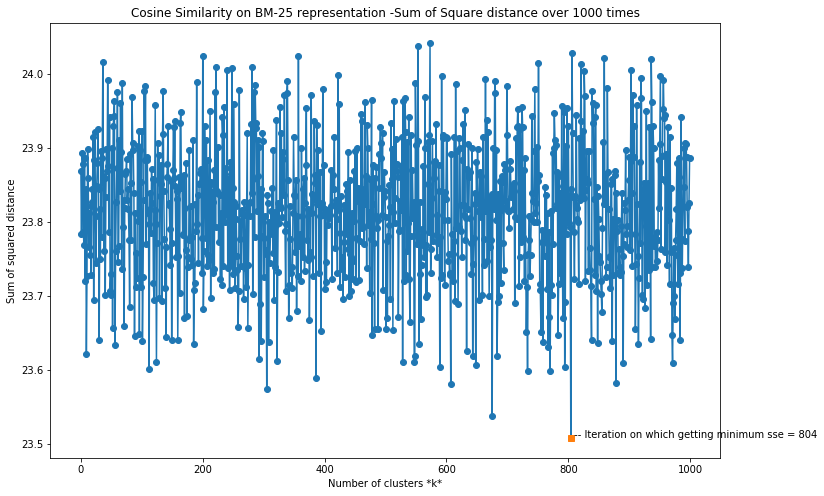

In [35]:
summary_func_n_iter(cosine_bm25,"Cosine Similarity","BM-25 representation")

### Cosine similarity with TFIDF Representation Summary over 1000 iteration to get better summary

'She wonders how many parents realize "no added sugar" doesn\'t mean "low sugar. In fact, a 12-ounce bottle of grape soda has 159 calories. "What is needed to replace fluid loss and satisfy thirst is the same beverage we\'ve been drinking for millions of years, and that\'s water. Before the rise of soda, juice and other sweetened drinks during the latter half of the 20th century, water and milk were children\'s primary beverages.In a nation where nearly a third of children are either overweight or at risk of becoming overweight, health officials now say high-calorie beverages have little place in a young child\'s diet. He was particularly critical of one bagged juice beverage\'s claim that it "hydrates kids better than water. Despite the guidelines, 60 percent of 1-year-olds drink juice, averaging 11 1/2 ounces a day, according to 2002 USDA data.'

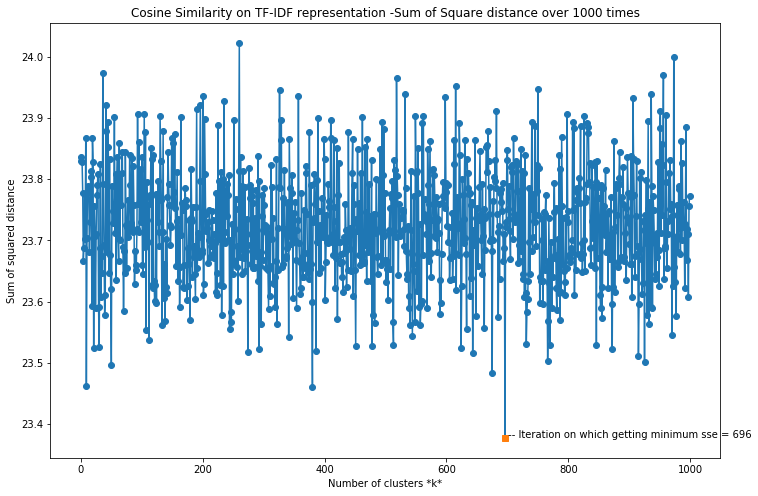

In [36]:
summary_func_n_iter(cosine_tfidf,"Cosine Similarity","TF-IDF representation")

### Cosine similarity with Binary Representation Summary over 1000 iteration to get better summary

'He was particularly critical of one bagged juice beverage\'s claim that it "hydrates kids better than water. The same amount of unsweetened grape juice packs 228 calories. "With the possible exception of milk, children do not need any calorie containing beverages," Ludwig says.  \nMost parents wouldn\'t dream of it. That\'s up from 57 percent less than a decade before.The USDA also found that more children younger than 1 are drinking juice, up from 35 percent to 39 percent, though they are drinking less of it.While juice can be a healthy way to occasionally get picky children to consume more fruit, researchers say using it too often can exacerbate bad eating habits by training kids to prefer -- and hold out for -- something sweet. Despite her vigilance, Kwitkiwski says it\'s easy to be confused by mixed messages, especially on product labels.'

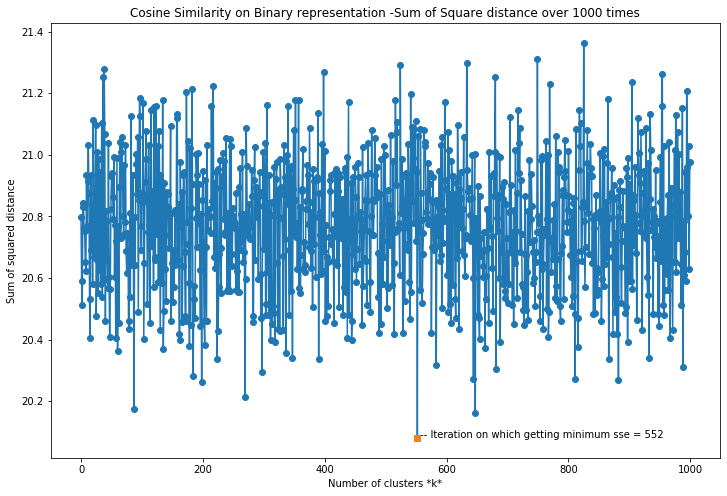

In [37]:
summary_func_n_iter(cosine_binary,"Cosine Similarity","Binary representation" )

### Cosine similarity with count Representation Summary over 1000 iteration to get better summary

'The same amount of unsweetened grape juice packs 228 calories. Despite her vigilance, Kwitkiwski says it\'s easy to be confused by mixed messages, especially on product labels. Carol Freysinger, executive director of the Juice Products Association, says some producers have felt an impact since the pediatrics guidelines were released, but she wouldn\'t elaborate.She is critical of doctors telling parents to eliminate juice, saying it gives a bad name to a healthy beverage and could prevent people from getting important nutrients juice offers. ""This is an example of how children\'s diets can be perverted by the unbridled actions of the food industry when it places private profit ahead of public health," he says. "What is needed to replace fluid loss and satisfy thirst is the same beverage we\'ve been drinking for millions of years, and that\'s water. After that, juice is optional, though the group favors whole produce and urges parents to limit juice to 4 to 6 ounces a day for children

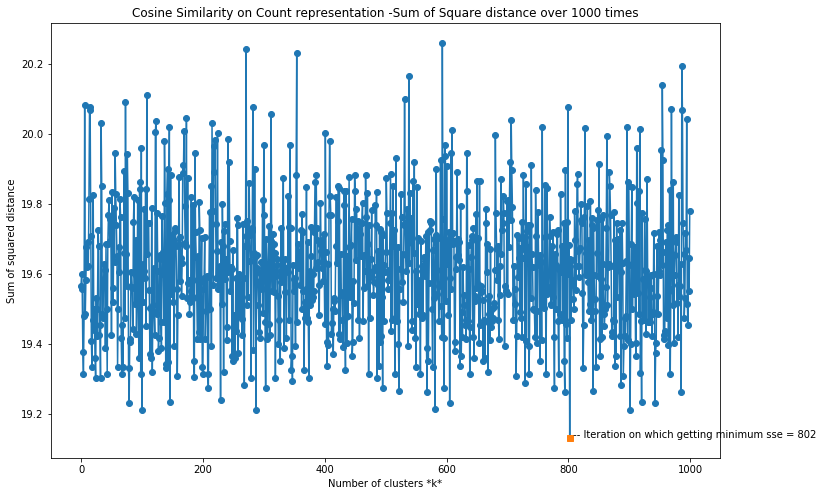

In [38]:
summary_func_n_iter(cosine_count,"Cosine Similarity","Count representation" )

### Euclidean similarity with Cosine Representation Summary over 1000 iteration to get better summary

'A growing body of science is linking sweet drinks, natural or otherwise, to a host of child health concerns, everything from bulging bellies to tooth decay. "Juice is only minimally better than soda. She wonders how many parents realize "no added sugar" doesn\'t mean "low sugar. Dr. William Dietz, with the division of nutrition and physical activity at the Centers for Disease Control and Prevention, says parents need to be firm -- thirst is satisfied with water, hunger with solid foods. Caloric beverages can blur that line.Kimberly Kwitkiwski, a mother of twin 2-year-old girls, has found a middle ground. Despite her vigilance, Kwitkiwski says it\'s easy to be confused by mixed messages, especially on product labels.'

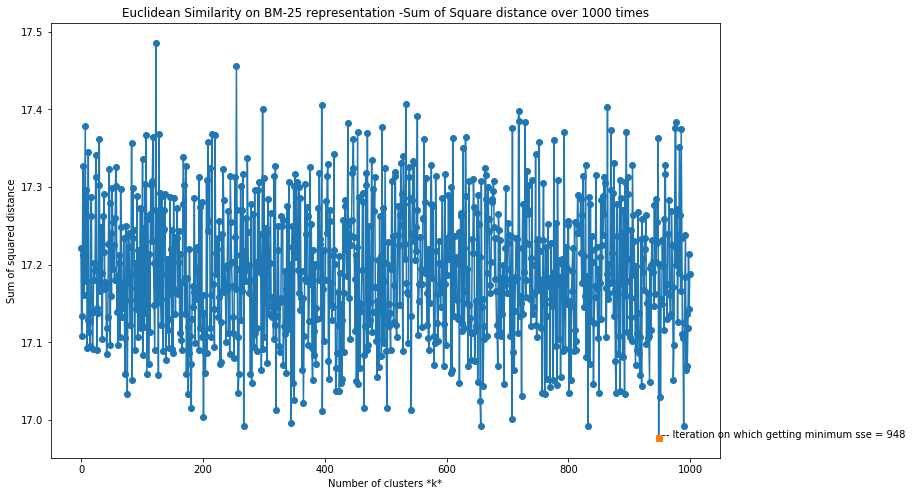

In [39]:
summary_func_n_iter(euclidean_bm25,"Euclidean Similarity","BM-25 representation" )

### euclidean similarity with TFIDF Representation Summary over 1000 iteration to get better summary

'"All of these beverages are largely the same. Before the rise of soda, juice and other sweetened drinks during the latter half of the 20th century, water and milk were children\'s primary beverages.In a nation where nearly a third of children are either overweight or at risk of becoming overweight, health officials now say high-calorie beverages have little place in a young child\'s diet. But researchers say that when a baby\'s bottle or cup is filled with juice even the 100 percent, all natural, no sugar added stuff  parents might as well be pouring Pepsi. Carol Freysinger, executive director of the Juice Products Association, says some producers have felt an impact since the pediatrics guidelines were released, but she wouldn\'t elaborate.She is critical of doctors telling parents to eliminate juice, saying it gives a bad name to a healthy beverage and could prevent people from getting important nutrients juice offers. Despite the guidelines, 60 percent of 1-year-olds drink juice, a

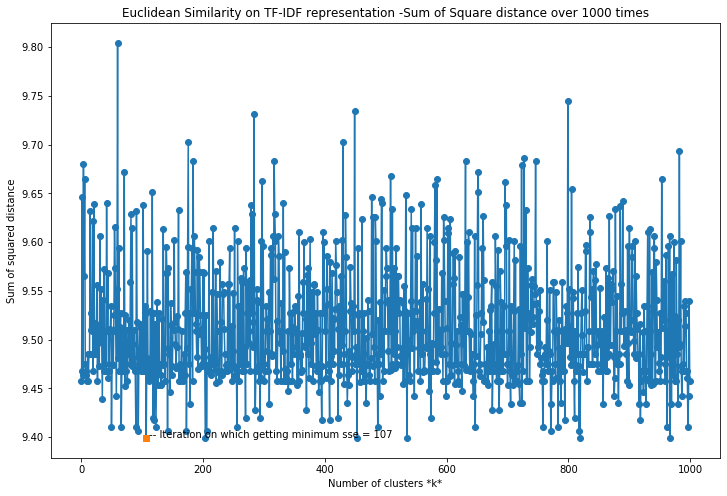

In [40]:
summary_func_n_iter(euclidean_tfidf,"Euclidean Similarity","TF-IDF representation" )

### Euclidean similarity with Binary Representation Summary over 1000 iteration to get better summary

'Part of the problem is that the calories in juice are so concentrated. But researchers say that when a baby\'s bottle or cup is filled with juice even the 100 percent, all natural, no sugar added stuff  parents might as well be pouring Pepsi. Just half a cup (4 ounces) of apple juice has 60 calories, the same as a whole apple, but without the fiber that makes fruit filling.In 2001, the American Academy of Pediatrics issued guidelines saying fruit juice should not be given to children younger than 6 months, and that there is no nutritional reason to give it to them before their first birthday. "With the possible exception of milk, children do not need any calorie containing beverages," Ludwig says. Carol Freysinger, executive director of the Juice Products Association, says some producers have felt an impact since the pediatrics guidelines were released, but she wouldn\'t elaborate.She is critical of doctors telling parents to eliminate juice, saying it gives a bad name to a healthy be

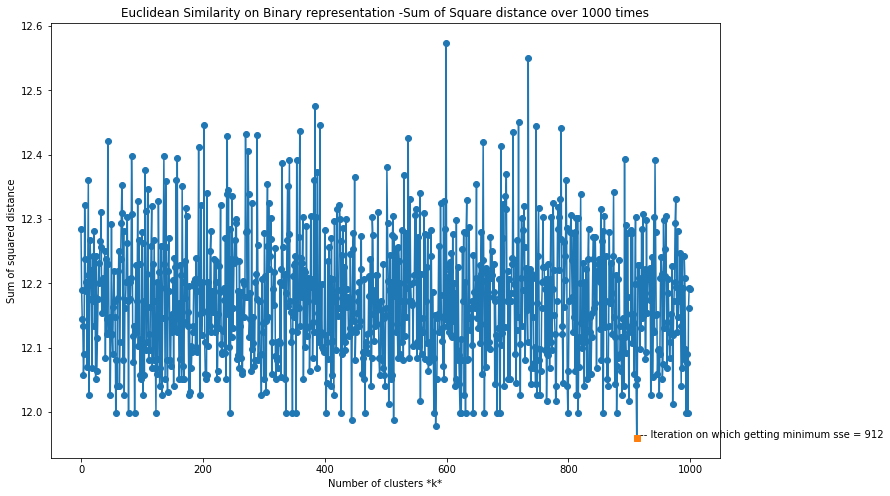

In [41]:
summary_func_n_iter(euclidean_binary,"Euclidean Similarity","Binary representation" )

### Euclidean similarity with Count Representation Summary over 1000 iteration to get better summary

'Part of the problem is that the calories in juice are so concentrated. "The danger of juice is that too much can throw off the balance of calories and nutrients children need, according to Dr. Terrill Bravender, director of adolescent medicine at Duke University Medical Center.In very young children, too much juice cuts the appetite for nutritionally superior breast milk or formula. But researchers say that when a baby\'s bottle or cup is filled with juice even the 100 percent, all natural, no sugar added stuff  parents might as well be pouring Pepsi. "With the possible exception of milk, children do not need any calorie containing beverages," Ludwig says. Carol Freysinger, executive director of the Juice Products Association, says some producers have felt an impact since the pediatrics guidelines were released, but she wouldn\'t elaborate.She is critical of doctors telling parents to eliminate juice, saying it gives a bad name to a healthy beverage and could prevent people from getti

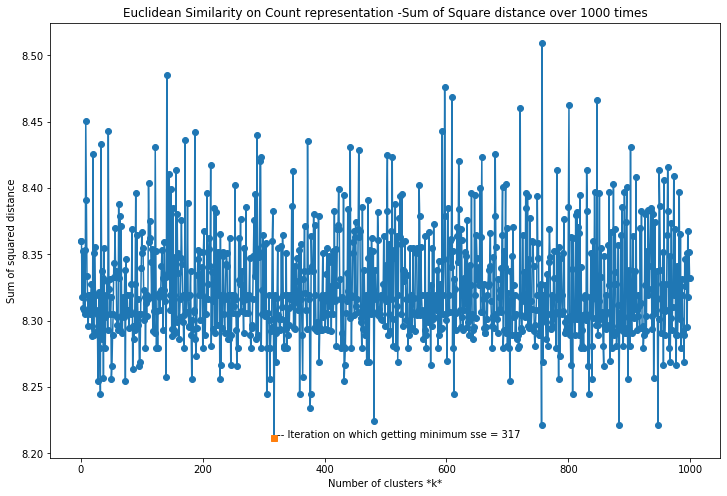

In [42]:
summary_func_n_iter(euclidean_count,"Euclidean Similarity","Count representation" )

### Jaccard similarity with Binary Representation Summary over 1000 iteration to get better summary

'The same amount of unsweetened grape juice packs 228 calories. "With the possible exception of milk, children do not need any calorie containing beverages," Ludwig says.  \nMost parents wouldn\'t dream of it. "Ludwig also is critical of juice marketing efforts, saying parents are easily misled into thinking they are making healthy choices. Despite her vigilance, Kwitkiwski says it\'s easy to be confused by mixed messages, especially on product labels. Despite the guidelines, 60 percent of 1-year-olds drink juice, averaging 11 1/2 ounces a day, according to 2002 USDA data.'

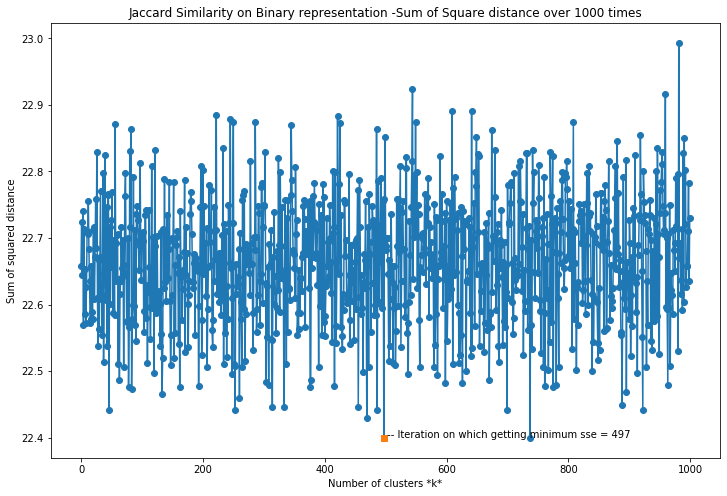

In [43]:
summary_func_n_iter(jaccard_binary,"Jaccard Similarity","Binary representation" )

In [44]:
# f,ax = plt.subplots(figsize=(15, 15))
# fig=sns.heatmap(sentences_cluster_check, cmap="YlGnBu")

# figure = fig.get_figure()    
# figure.savefig('sse.png', dpi=50)

## normal summaries

## euclidean BM25 summary

In [45]:
euclidean_BM25_summary=summary_func(euclidean_bm25)
print(euclidean_BM25_summary)

A growing body of science is linking sweet drinks, natural or otherwise, to a host of child health concerns, everything from bulging bellies to tooth decay. "Juice is only minimally better than soda. That's up from 57 percent less than a decade before.The USDA also found that more children younger than 1 are drinking juice, up from 35 percent to 39 percent, though they are drinking less of it.While juice can be a healthy way to occasionally get picky children to consume more fruit, researchers say using it too often can exacerbate bad eating habits by training kids to prefer -- and hold out for -- something sweet. "What is needed to replace fluid loss and satisfy thirst is the same beverage we've been drinking for millions of years, and that's water. ""This is an example of how children's diets can be perverted by the unbridled actions of the food industry when it places private profit ahead of public health," he says. Despite her vigilance, Kwitkiwski says it's easy to be confused by 

## cosine BM25 summary

In [46]:
cosine_BM25_summary=summary_func(cosine_bm25)
print(cosine_BM25_summary)

The same amount of unsweetened grape juice packs 228 calories. But researchers say that when a baby's bottle or cup is filled with juice even the 100 percent, all natural, no sugar added stuff  parents might as well be pouring Pepsi. "With the possible exception of milk, children do not need any calorie containing beverages," Ludwig says. He was particularly critical of one bagged juice beverage's claim that it "hydrates kids better than water. Carol Freysinger, executive director of the Juice Products Association, says some producers have felt an impact since the pediatrics guidelines were released, but she wouldn't elaborate.She is critical of doctors telling parents to eliminate juice, saying it gives a bad name to a healthy beverage and could prevent people from getting important nutrients juice offers. Dr. William Dietz, with the division of nutrition and physical activity at the Centers for Disease Control and Prevention, says parents need to be firm -- thirst is satisfied with w

## euclidean tfidf summary

In [47]:
euclidean_tfidf_summary=summary_func(euclidean_tfidf)
print(euclidean_tfidf_summary)

"All of these beverages are largely the same. Before the rise of soda, juice and other sweetened drinks during the latter half of the 20th century, water and milk were children's primary beverages.In a nation where nearly a third of children are either overweight or at risk of becoming overweight, health officials now say high-calorie beverages have little place in a young child's diet. A growing body of science is linking sweet drinks, natural or otherwise, to a host of child health concerns, everything from bulging bellies to tooth decay. Carol Freysinger, executive director of the Juice Products Association, says some producers have felt an impact since the pediatrics guidelines were released, but she wouldn't elaborate.She is critical of doctors telling parents to eliminate juice, saying it gives a bad name to a healthy beverage and could prevent people from getting important nutrients juice offers. Despite the guidelines, 60 percent of 1-year-olds drink juice, averaging 11 1/2 oun

## cosine tfidf summary

In [48]:
cosine_tfidf_summary=summary_func(cosine_tfidf)
print(cosine_tfidf_summary)

The same amount of unsweetened grape juice packs 228 calories. But researchers say that when a baby's bottle or cup is filled with juice even the 100 percent, all natural, no sugar added stuff  parents might as well be pouring Pepsi. "With the possible exception of milk, children do not need any calorie containing beverages," Ludwig says. He was particularly critical of one bagged juice beverage's claim that it "hydrates kids better than water. Carol Freysinger, executive director of the Juice Products Association, says some producers have felt an impact since the pediatrics guidelines were released, but she wouldn't elaborate.She is critical of doctors telling parents to eliminate juice, saying it gives a bad name to a healthy beverage and could prevent people from getting important nutrients juice offers. Dr. William Dietz, with the division of nutrition and physical activity at the Centers for Disease Control and Prevention, says parents need to be firm -- thirst is satisfied with w

## euclidean count summary

In [49]:
euclidean_count_summary=summary_func(euclidean_count)
print(euclidean_count_summary)

 
Most parents wouldn't dream of it. They are 100 percent sugar," Dr. David Ludwig, an expert on pediatric obesity at Children's Hospital Boston, said recently. Just half a cup (4 ounces) of apple juice has 60 calories, the same as a whole apple, but without the fiber that makes fruit filling.In 2001, the American Academy of Pediatrics issued guidelines saying fruit juice should not be given to children younger than 6 months, and that there is no nutritional reason to give it to them before their first birthday. She is careful about her daughters' sugar intake, but since Jade and Jillian won't drink straight water, she spikes it with a few ounces of low-sugar juice.Over the course of a day, the Hooksett, New Hampshire, woman's children get only about 4 or 5 ounces of light juice. Carol Freysinger, executive director of the Juice Products Association, says some producers have felt an impact since the pediatrics guidelines were released, but she wouldn't elaborate.She is critical of doct

## cosine count summary

In [50]:
cosine_count_summary=summary_func(cosine_count)
print(cosine_count_summary)

Caloric beverages can blur that line.Kimberly Kwitkiwski, a mother of twin 2-year-old girls, has found a middle ground. In fact, a 12-ounce bottle of grape soda has 159 calories. "The trouble is that parents who are quick to limit a child's soft drink consumption often overlook or even encourage juice indulgence thanks to the beverage's good-for-you image.But that image can be overstated. Experts say pudgy children should avoid juice altogether.Those guidelines concern the juice industry, which markets 6 3/4-ounce juice boxes and bags to kids. ""This is an example of how children's diets can be perverted by the unbridled actions of the food industry when it places private profit ahead of public health," he says. Dr. William Dietz, with the division of nutrition and physical activity at the Centers for Disease Control and Prevention, says parents need to be firm -- thirst is satisfied with water, hunger with solid foods.


## euclidean binary summary

In [51]:
euclidean_binary_summary=summary_func(euclidean_binary)
print(euclidean_binary_summary)

"The trouble is that parents who are quick to limit a child's soft drink consumption often overlook or even encourage juice indulgence thanks to the beverage's good-for-you image.But that image can be overstated. Part of the problem is that the calories in juice are so concentrated. She is careful about her daughters' sugar intake, but since Jade and Jillian won't drink straight water, she spikes it with a few ounces of low-sugar juice.Over the course of a day, the Hooksett, New Hampshire, woman's children get only about 4 or 5 ounces of light juice. "With the possible exception of milk, children do not need any calorie containing beverages," Ludwig says. Carol Freysinger, executive director of the Juice Products Association, says some producers have felt an impact since the pediatrics guidelines were released, but she wouldn't elaborate.She is critical of doctors telling parents to eliminate juice, saying it gives a bad name to a healthy beverage and could prevent people from getting 

## cosine binary summary

In [52]:
cosine_binary_summary=summary_func(cosine_binary)
print(cosine_binary_summary)


The same amount of unsweetened grape juice packs 228 calories. Just half a cup (4 ounces) of apple juice has 60 calories, the same as a whole apple, but without the fiber that makes fruit filling.In 2001, the American Academy of Pediatrics issued guidelines saying fruit juice should not be given to children younger than 6 months, and that there is no nutritional reason to give it to them before their first birthday. Despite the guidelines, 60 percent of 1-year-olds drink juice, averaging 11 1/2 ounces a day, according to 2002 USDA data. "What is needed to replace fluid loss and satisfy thirst is the same beverage we've been drinking for millions of years, and that's water. The $10 billion juice industry maintains that a conclusive link between its products and obesity has yet to be established, but researchers say sugar is sugar, and sweet drinks of any kind must be consumed with care.Overuse of juice is a relatively recent phenomenon.  
Most parents wouldn't dream of it.


## jaccard binary summary

In [53]:
jaccard_binary_summary=summary_func(jaccard_binary)
print(jaccard_binary_summary)


The same amount of unsweetened grape juice packs 228 calories. Despite the guidelines, 60 percent of 1-year-olds drink juice, averaging 11 1/2 ounces a day, according to 2002 USDA data. "Juice is only minimally better than soda. "What is needed to replace fluid loss and satisfy thirst is the same beverage we've been drinking for millions of years, and that's water.  
Most parents wouldn't dream of it. Caloric beverages can blur that line.Kimberly Kwitkiwski, a mother of twin 2-year-old girls, has found a middle ground.


In [54]:
# p=open(file_name[0]+"_summary."+file_name[1],"a")

In [55]:
# p.write("euclidean BM25 summary\n\n"+euclidean_BM25_summary+"\n\n\n\n\n\n\n\n cosine BM25 summary \n\n"+cosine_BM25_summary+"\n\n\n\n\n\n\n\n euclidean tfidf summary \n\n"+euclidean_tfidf_summary+"\n\n\n\n\n\n\n\n cosine tfidf summary \n\n"+cosine_tfidf_summary+"\n\n\n\n\n\n\n\n euclidean count summary \n\n"+euclidean_count_summary +"\n\n\n\n\n\n\n\n cosine count summary \n\n"+cosine_count_summary+"\n\n\n\n\n\n\n\n euclidean binary summary \n\n"+euclidean_binary_summary +"\n\n\n\n\n\n\n\n cosine binary summary \n\n"+cosine_binary_summary+"\n\n\n\n\n\n\n\n jaccard binary summary \n\n"+jaccard_binary_summary+"\n\n\n\n\n\n\n\n"+data[0])
# # p.close()